To use the model, we need the following information from a user (Be careful about uppercase and lowercase letters):
* Age    ---> Integer Number
* Sex       ---> ['M', 'F']
* ChestPainType ---> ['ATA', 'NAP', 'ASY', 'TA']
* RestingBP ---> Integer Number
* FastingBS ---> [0,1]
* RestingECG---> ["Normal", "ST", "LVH"]

# Importing the libraries

**Let's understand the dataset**

This heart failure dataset is based on some features such as,


- **Age** : Age of the patient
- **Sex** : Gender of the patient
- **ChestPainType** : 4 types of chest pain is provided in this dataset
    
    -ATA (Atypical angina): Chest pain that is not typical of angina, such as sharp,               stabbing or burning pain that may be located in areas other than the chest.

    -NAP (Non-anginal pain): Chest pain that is not caused by reduced blood flow to the           heart,but may still be related to heart disease. The pain may be sharp, stabbing, or         burning and may be caused by conditions such as inflammation of the chest wall,               acid reflux, or anxiety.

    -ASY (Asymptomatic): Patients who do not experience any chest pain or discomfort related       to their heart condition, but may still have abnormal results on diagnostic tests             indicating the presence of heart disease.
 
    -TA (Typical angina): Chest pain that is described as a discomfort or pressure in the         chest that is provoked by physical exertion or emotional stress and relieved by rest or       medication. The pain is typically substernal (behind the breastbone) and may radiate to       the neck, jaw, shoulders, arms, or back.

- **RestingBP** : Refers to the measurement of blood pressure when the body is at rest, and the                 individual is sitting or lying down. It is measured in millimeters of mercury                 (mmHg)

- **Cholesterol** : Refers to the cholesterol in blood and it is expressed in milligrams per                     deciliter (mg/dL)

- **FastingBS** : Fasting blood sugar (BS) refers to the level of glucose in the blood after an                 overnight fast of at least 8 hours.It is expressed in milligrams per deciliter               (mg/dL). In this dataset, fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

- **RestingECG** : Resting ECG (Electrocardiogram) is a medical test that records the electrical                activity of the heart while a person is at rest. 

- **MaxHR** : MaxHR stands for maximum heart rate and refers to the highest number of times your           heart beats in one minute during intense physical activity.

- **ExcerciseAngina** : Refers to chest pain or discomfort that occurs during physical activity                       or exertion.
    
- **OldPeak** : Oldpeak is a measure of the amount of ST depression on an electrocardiogram                  (ECG) during exercise. ST depression is a sign of reduced blood flow to the                  heart muscle and is associated with a higher risk of coronary artery disease.

- **STslope** : ST slope refers to the direction and magnitude of the ST segment deviation from               he baseline on an electrocardiogram (ECG).
                

**Problem Statement**

We have to predict if a patient would be diagnosed to have heart disease based on the given features. 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load the dataset**

In [33]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Exploratory Data Analysis (EDA)

In [34]:
# Label Encoding
label_encoder = preprocessing.LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


**There's actually two issues here that need to be resolved. First one is, there are total 172 patients who have 0 cholesterol- which is invalid and the second one is, a patient have a 0 resting blood pressure which is also invalid . As in the second issue there is only one row so we will drop that.We dropped the entire Cholesterol column here**

**You might think that the minimum value of FastingBS so this might also be an issue. But fortunately it's not. Because here 0 isn't referring actual 0. Recall that we considered fasting blood sugar** **[1: if FastingBS > 120 mg/dL, 0: otherwise]** **, so 0 is actually referring a group with blood sugar less than 120 mg/dL**


In [36]:
# Dropping the Cholesterol column

df = df.drop('Cholesterol',axis=1)

In [37]:
# Dropping 4th row

df.drop(4,inplace=True)

In [38]:

df.shape

(917, 11)

In [39]:
Hdislabel = ['Have heart disease','Do not have heart disease']
val_counts = [508,409] 
fig = px.pie(values=val_counts,names=Hdislabel,
             color=Hdislabel,
             color_discrete_map={'Have heart disease':'red',
                                 'Do not have heart disease':'#13F306'},
             title='Heart disease count')

fig.show()

Text(0.5, -0.23, 'Fig: Annoted values of correlation coefficient of each pair of features')

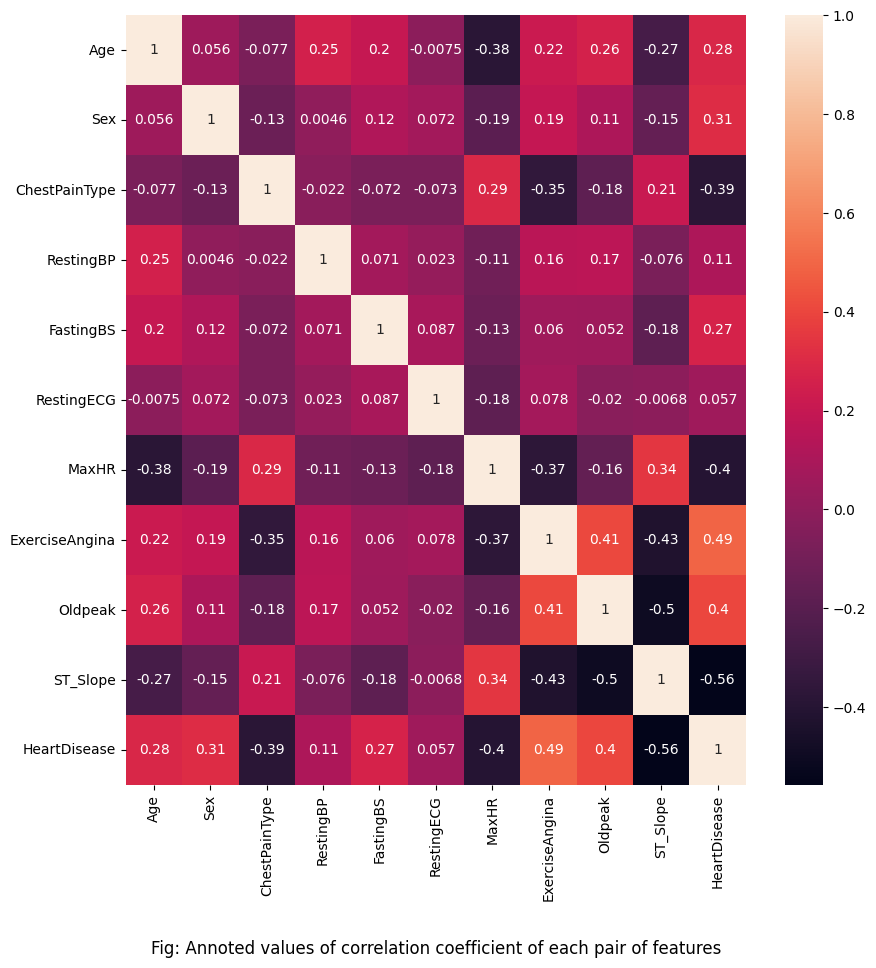

In [40]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),annot=True)
plt.title('Fig: Annoted values of correlation coefficient of each pair of features', y=-0.23)

In [41]:
# Define a function that takes a dataset and a threshold value as inputs and returns the set of all names of correlated columns
def correlation(dataset, threshold):
    # Initialize an empty set to store the names of correlated columns
    col_corr = set()
    
    # Calculate the correlation matrix for the dataset using the 'corr' method
    corr_matrix = dataset.corr()
    
    # Iterate over the columns of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if the absolute value of the correlation coefficient is greater than the threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # If it is, add the name of the column to the set of correlated columns
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    # Return the set of correlated column names
    return col_corr


In [42]:
corr_features = correlation(df, 0.35)
if 'HeartDisease' in corr_features:
  corr_features.remove('HeartDisease')
corr_features

{'ExerciseAngina', 'MaxHR', 'Oldpeak', 'ST_Slope'}

In [43]:
X_corr = df.drop(corr_features,axis=1)
X_corr

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,HeartDisease
0,40,1,1,140,0,1,0
1,49,0,2,160,0,1,1
2,37,1,1,130,0,2,0
3,48,0,0,138,0,1,1
5,39,1,2,120,0,1,0
...,...,...,...,...,...,...,...
913,45,1,3,110,0,1,1
914,68,1,0,144,1,1,1
915,57,1,0,130,0,1,1
916,57,0,1,130,0,0,1


In [44]:
X = X_corr.drop('HeartDisease',axis=1)
y = X_corr['HeartDisease']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [46]:
# check shape
print('x_train: ', X_train.shape)
print('x_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (733, 6)
x_test:  (184, 6)
y_train:  (733,)
y_test:  (184,)


# Logistic Regression

In [47]:
# Apply Logistic Regression Algorithm
import pickle
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)
filename = 'HeartDisease_model_LR.sav'
pickle.dump(LR, open(filename, 'wb'))

**Model evaluation**

Text(0.5, 23.52222222222222, 'Predicted label')

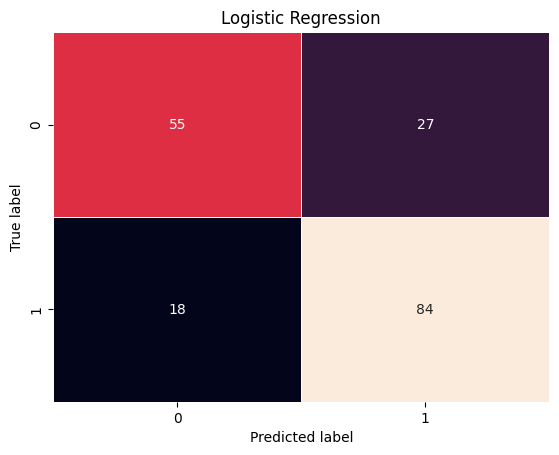

In [48]:
y_pred = LR.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')